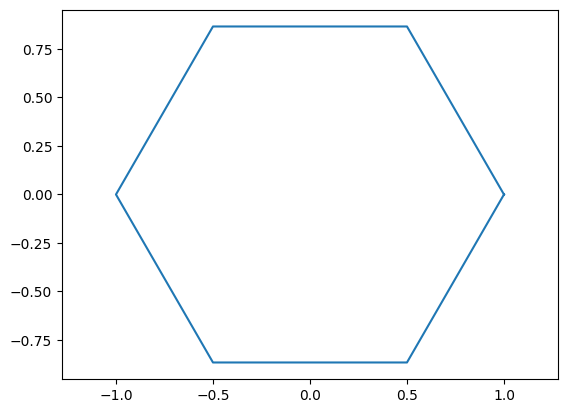

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the hexagon
x = np.array([1, 0.5, -0.5, -1, -0.5, 0.5, 1])
y = np.array([0, 0.866, 0.866, 0, -0.866, -0.866, 0])

# Plot the hexagon
plt.plot(x, y)
plt.axis('equal')
plt.show()


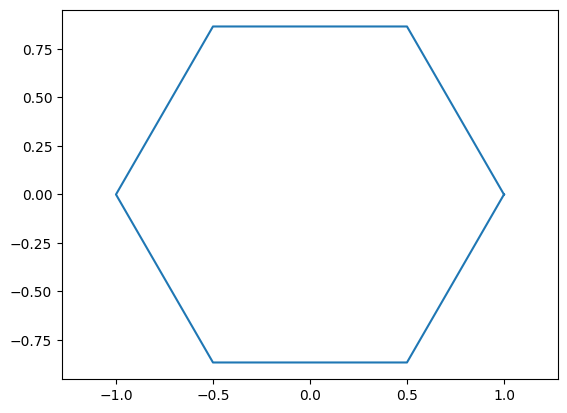

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the angle increments for each vertex of the hexagon
angles = np.linspace(0, 2*np.pi, 7)

# Calculate the x and y coordinates of the hexagon vertices
x = np.cos(angles)
y = np.sin(angles)


# Create the hexagon polygon
hexagon = Polygon(list(zip(x, y)), closed=True)

# Plot the hexagon
plt.plot(x, y)
plt.axis('equal')
plt.show()


(-1.5, 1.5)

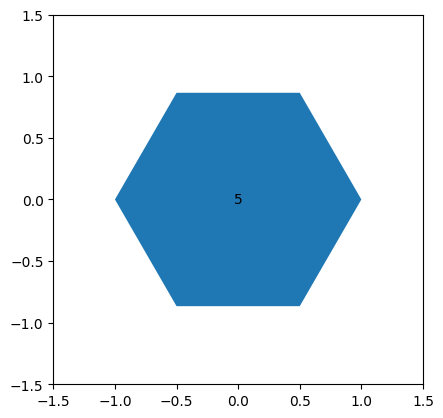

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from matplotlib.patches import Polygon

# Define the angle increments for each vertex of the hexagon
angles = np.linspace(0, 2*np.pi, 7)

# Calculate the x and y coordinates of the hexagon vertices
x = np.cos(angles)
y = np.sin(angles)

# Create the hexagon polygon
hexagon = Polygon(list(zip(x, y)), closed=True)

# Create a figure and axes
fig, ax = plt.subplots()

ax.add_patch(hexagon)
ax.text(0, 0, 5, ha='center', va='center')

# Set the aspect ratio to equal
ax.set_aspect('equal')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


In [4]:
class Hex:
    
    def __init__(self, d1, d2, color='blue'):
        N = 5
        self.d1 = d1
        self.d2 = d2
        self.index = d2*(N) + d1 + 1
        angles = np.linspace(0, 2*np.pi, 7)
        # Calculate the x and y coordinates of the hexagon vertices
        x = np.cos(angles)
        y = np.sin(angles)
        self.xy = list(zip(x, y)) + 2*d1*self._translate_distance(30) + 2*d2*self._translate_distance(270)
        self.polygon = Polygon(self.xy, closed=True, color=color)
        self.xc, self.yc = self.get_polygon_center()
        
    def get_xy_of_a_point_at_angle(self, angle):
        radians = np.radians(angle)
        return np.array([np.cos(radians), np.sin(radians)])

    def _translate_distance(self, angle):
        """angle can be 30, 90, 150, 210, 270, 330"""
        return (self.get_xy_of_a_point_at_angle(angle+30) + self.get_xy_of_a_point_at_angle(angle-30)) / 2
        
    def get_polygon_center(self):
        x_coords = [point[0] for point in self.xy[:-1]]
        y_coords = [point[1] for point in self.xy[:-1]]
        center_x = np.mean(x_coords)
        center_y = np.mean(y_coords)
        return (center_x, center_y)


(-15.0, 5.0)

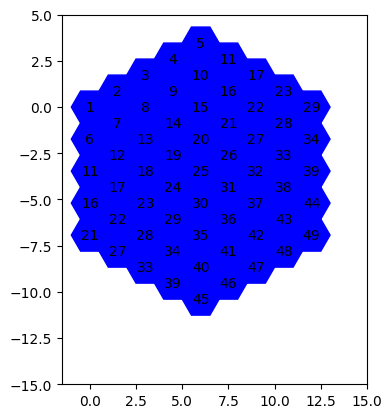

In [5]:
# Create a figure and axes
fig, ax = plt.subplots()

for i,j in ((0,0), (1, 0), (2,0), (3,0), (4,0),
            (0,1), (1, 1), (2,1), (3,1), (4,1), (5,1),
            (0,2), (1, 2), (2,2), (3,2), (4,2), (5,2), (6,2),
            (0,3), (1, 3), (2,3), (3,3), (4,3), (5,3), (6,3), (7,3),
            (0,4), (1, 4), (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (8,4),
            (1,5), (2, 5), (3,5), (4,5), (5,5), (6,5), (7,5), (8,5),
            (2,6), (3, 6), (4,6), (5,6), (6,6), (7,6), (8,6),
            (3,7), (4, 7), (5,7), (6,7), (7,7), (8,7),
            (4,8), (5, 8), (6,8), (7,8), (8,8),
            ):
    
    h = Hex(i,j)
    ax.add_patch(h.polygon)
    ax.text(h.xc, h.yc, h.index, ha='center', va='center')

# Set the aspect ratio to equal
ax.set_aspect('equal')
ax.set_aspect('equal')

ax.set_xlim(-1.5, 15)
ax.set_ylim(-15, 5)


Let's define a piece:


In [6]:
piece = [(0,0), (1,0), (2,0), (3,0)]

In [7]:
def translate(piece, d):
    dx, dy = d
    return [(x+dx, y+dy) for x, y in piece]

def add_piece(ax, piece, color='blue'):
    for hex in piece:
        h = Hex(*hex, color=color)
        ax.add_patch(h.polygon)
    return ax


def draw_pieces(pieces,colors):
    # Create a figure and axes
    fig, ax = plt.subplots()

    for piece, color in zip(pieces, colors):
        ax = add_piece(ax, piece, color)
        
    # Set the aspect ratio to equal
    ax.set_aspect('equal')
    ax.set_aspect('equal')

    ax.set_xlim(-7, 10)
    ax.set_ylim(-7, 10)

Translation:

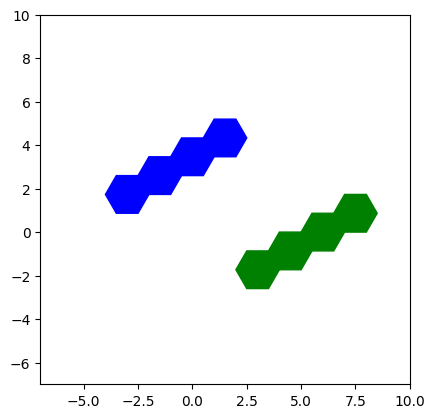

In [8]:
draw_pieces([translate(piece, (-2, -2)), translate(piece, (2, 2))], ['blue', 'green'])

And now add rotation (this is tricky to do directly in this skewed system so we'll do this: (x,y) -> (r,theta) -> rotation to delta -> (r,theta + dtheta) -> (x', y')):

In [9]:
def normalize_piece(piece):
    """translate the piece so that the center of mass is at (0,0)
    """
    x_norm = int(np.round(np.mean([x for x,y in piece])))
    y_norm = int(np.round(np.mean([y for x,y in piece])))
    
    return [(x - x_norm, y - y_norm) for x, y in piece]

A = np.array([[np.cos(np.radians(30)), np.sin(np.radians(30))], [0, -1]]).T

def convert_skewed_to_cartesian(A, x):
    # so (1,0) in skewed is (cos(30), sin(30)) in cartesian  (np.sqrt(3)/2, 0.5)
    # and (0,1) in skewed is (-1, 0) in cartesian (this is cos(270), sin(270))
    return A @ np.array(x)
    
def convert_cartesian_to_skewed(A, x):
    return np.linalg.inv(A) @ np.array(x)

def rotate_in_cartesian(x, alpha):
    # if we go counter-clockwise
    R = np.array([[np.cos(np.radians(alpha)), -np.sin(np.radians(alpha))], [np.sin(np.radians(alpha)), np.cos(np.radians(alpha))]])
    return R @ x


def rotate(piece, angle):
    """rotate the piece by angle degrees (angle can be only 0, 60, 120, 180, 240, 300)
    we always do the rotation relative to the center of mass of the piece
    """
    if angle not in {0, 60, 120, 180, 240, 300}:
        raise ValueError("angle must be 0, 60, 120, 180, 240 or 300")
        
    piece1 = normalize_piece(piece)

    temp = []
    for x in piece1:
        a = convert_skewed_to_cartesian(A, x)
        b = rotate_in_cartesian(a, angle)
        c = convert_cartesian_to_skewed(A, b)
        temp.append(tuple(np.round(c).astype(int)))
    
    return temp

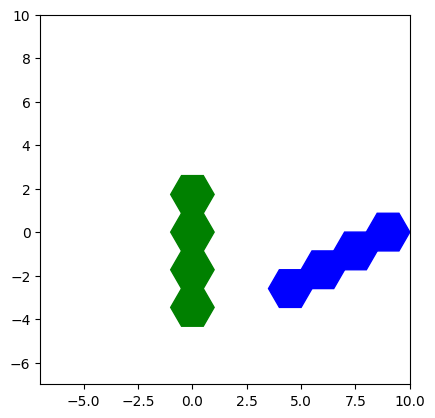

In [10]:
draw_pieces([translate(piece, (3,3)), rotate(piece, 60)], ['blue', 'green'])

# Pieces


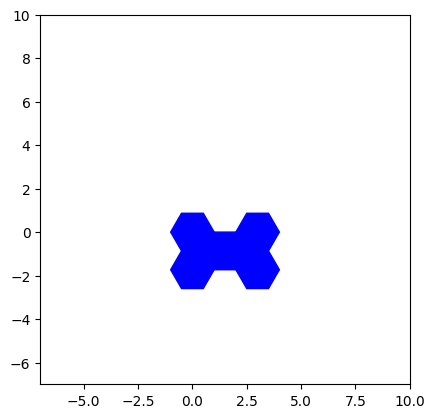

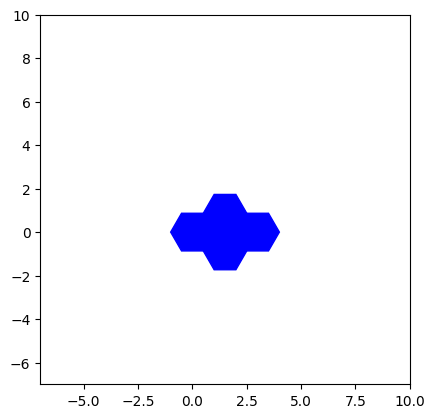

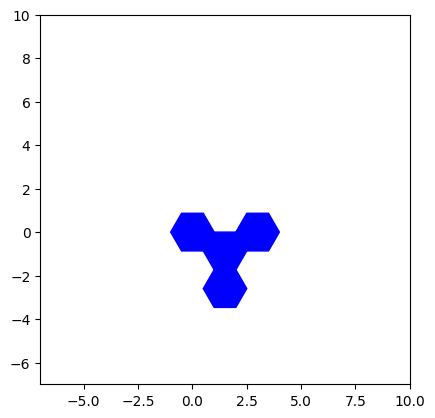

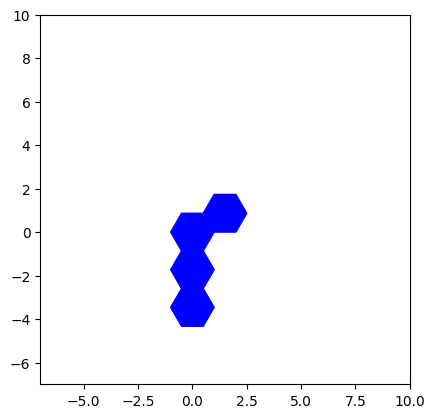

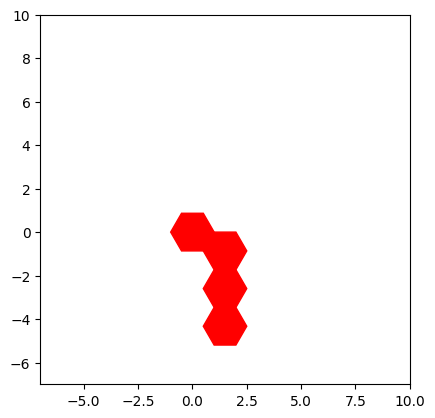

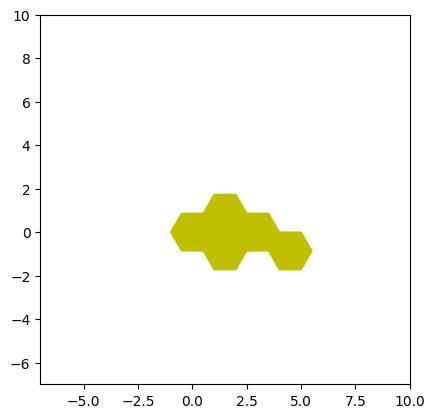

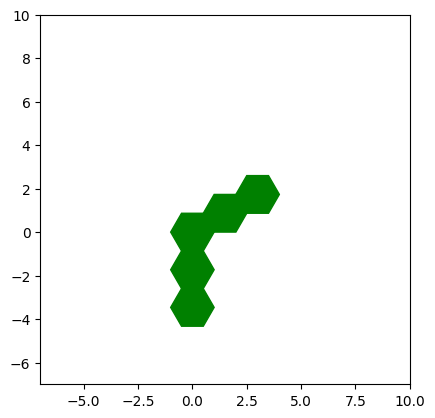

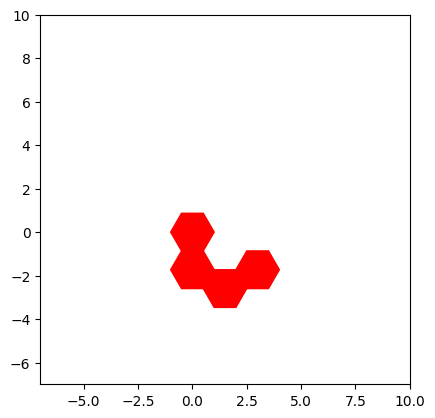

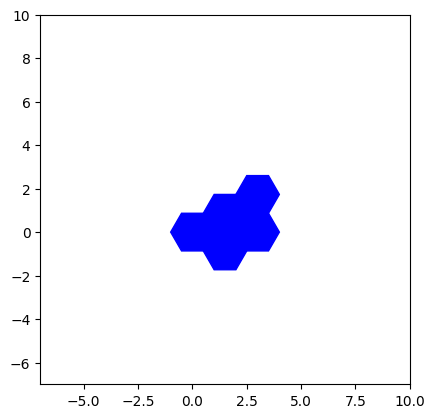

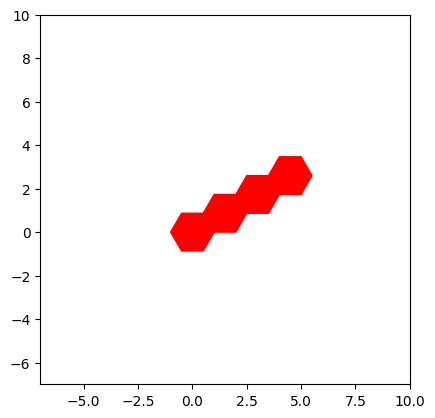

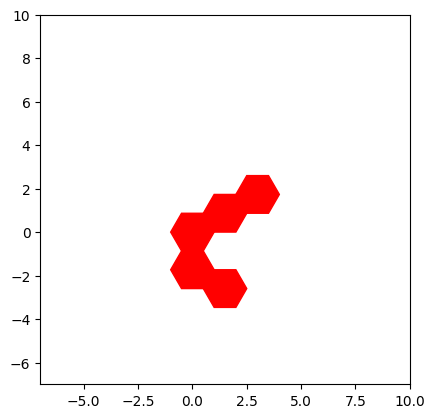

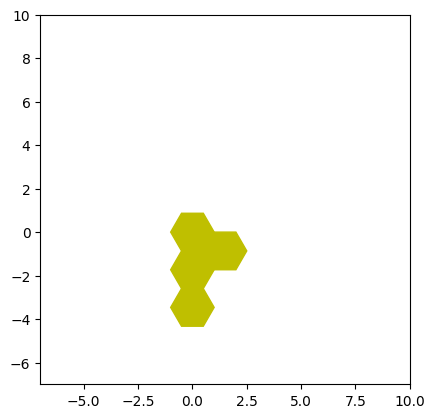

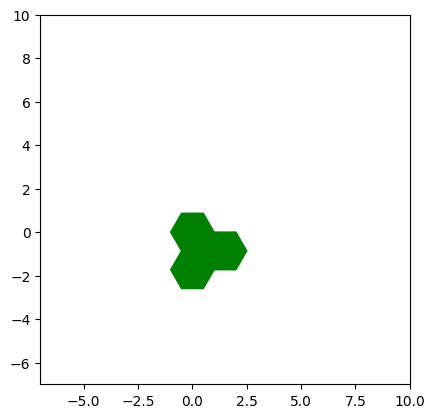

In [36]:

bone = [(0,0), (0,1), (1,1), (2,1), (2,2)]
draw_pieces([bone], 'blue')
star = [(0,0), (1,0), (1,1), (2,1)]
draw_pieces([star], 'blue')
snowflake = [(0,0), (1,1), (1,2), (2,1)]
draw_pieces([snowflake], 'blue')
flag = [(0,0), (1,0), (0,1), (0,2)]
draw_pieces([flag], 'blue')
post = [(0,0), (1,1), (1,2), (1,3)]
draw_pieces([post], 'red')
gun = [(0,0), (1,0), (1,1), (2,1), (3,2)]
draw_pieces([gun], 'yellow')

tent = [(0,0), (1,0), (2,0), (0,1), (0,2)]
draw_pieces([tent], 'green')

bowl = [(0,0), (0,1), (1,2), (2,2)]
draw_pieces([bowl], 'red')
olympics = [(0,0), (1,0), (2,0), (1,1), (2,1)]
draw_pieces([olympics], 'blue')

pole = [(0,0), (1,0), (2,0), (3,0)]
draw_pieces([pole], 'red')

hook = [(0,0), (1,0), (2,0), (0,1), (1,2)]
draw_pieces([hook], 'red')

pipe = [(0,0), (0,1), (0, 2), (1,1)]
draw_pieces([pipe], 'yellow')

tiny = [(0,0), (0,1), (1,1)]
draw_pieces([tiny], 'green')




# Backtracking

So now we should implement backtr